In [47]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
import pickle

In [48]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [51]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [52]:
df= df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1 )


In [54]:
label_encoder_gender = LabelEncoder()
df['Gender']=label_encoder_gender.fit_transform(df['Gender'])

In [87]:
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [55]:
#Onehot encoding on Geography
onehot_encoder_geo = OneHotEncoder()
df_geography = onehot_encoder_geo.fit_transform(df[['Geography']]).toarray()

In [56]:
onehot_encoder_geo.get_feature_names_out(['Geography'])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [57]:
df_geography = pd.DataFrame(df_geography, columns=onehot_encoder.get_feature_names_out(['Geography']))

In [58]:
df_geography

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [59]:
df = pd.concat([df.drop('Geography',axis=1), df_geography], axis=1 )

In [60]:
df.corr()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
CreditScore,1.000000,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,-0.008928,0.005538,0.004780
Gender,-0.002857,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512,0.006772,-0.024628,0.016889
Age,-0.003965,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,-0.039208,0.046897,-0.001685
Tenure,0.000842,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.002848,-0.000567,0.003868
Balance,0.006268,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,-0.231329,0.401110,-0.134892
NumOfProducts,0.012238,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,0.001230,-0.010419,0.009039
HasCrCard,-0.005458,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.002467,0.010577,-0.013480
IsActiveMember,0.025651,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,0.003317,-0.020486,0.016732
EstimatedSalary,-0.001384,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,-0.003332,0.010297,-0.006482
Exited,-0.027094,-0.106512,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,-0.104955,0.173488,-0.052667


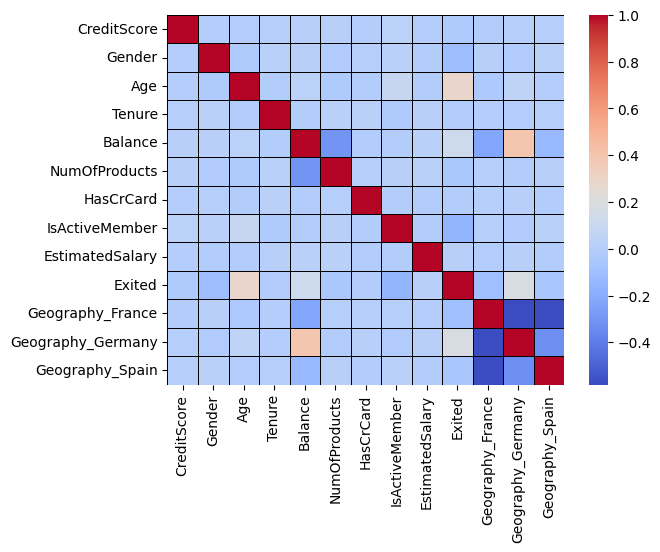

<Figure size 1400x700 with 0 Axes>

In [26]:
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black')
plt.figure(figsize=(14, 7))
plt.tight_layout()
plt.show()

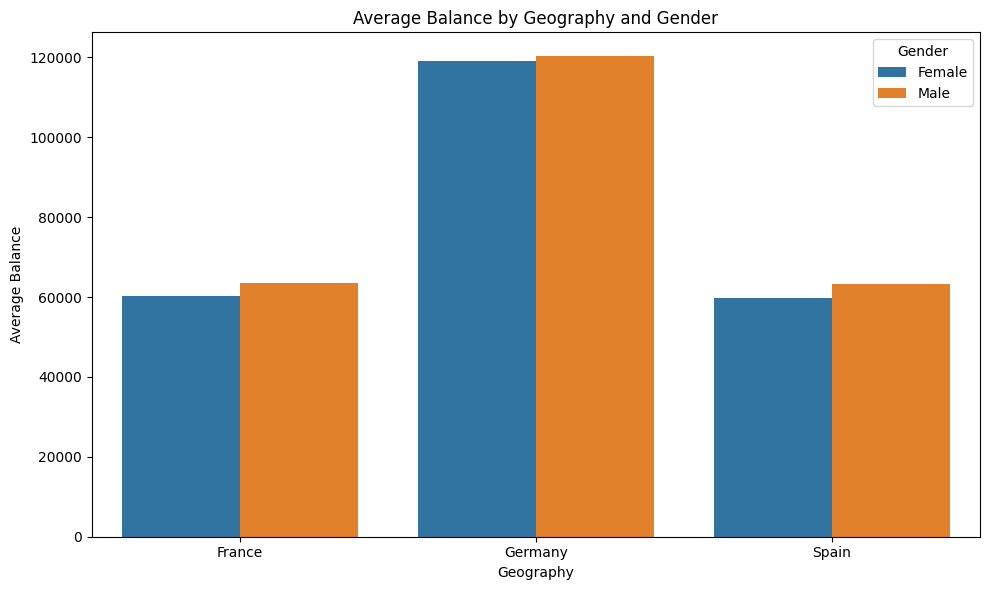

In [45]:
# Create a new figure with appropriate size
plt.figure(figsize=(10, 6))

# Calculate mean balance for each geography and gender
geography_gender_balance = []

for geo in ['France', 'Germany', 'Spain']:
    col_name = f'Geography_{geo}'
    for gender in [0, 1]:  # 0: Female, 1: Male
        avg_balance = df[(df[col_name] == 1) & (df['Gender'] == gender)]['Balance'].mean()
        geography_gender_balance.append({
            'Geography': geo,
            'Gender': 'Female' if gender == 0 else 'Male',
            'Average Balance': avg_balance
        })

# Convert to DataFrame
geography_balance = pd.DataFrame(geography_gender_balance)

# Create the barplot
sns.barplot(x='Geography', y='Average Balance', hue='Gender', data=geography_balance)
plt.title('Average Balance by Geography and Gender')
plt.tight_layout()

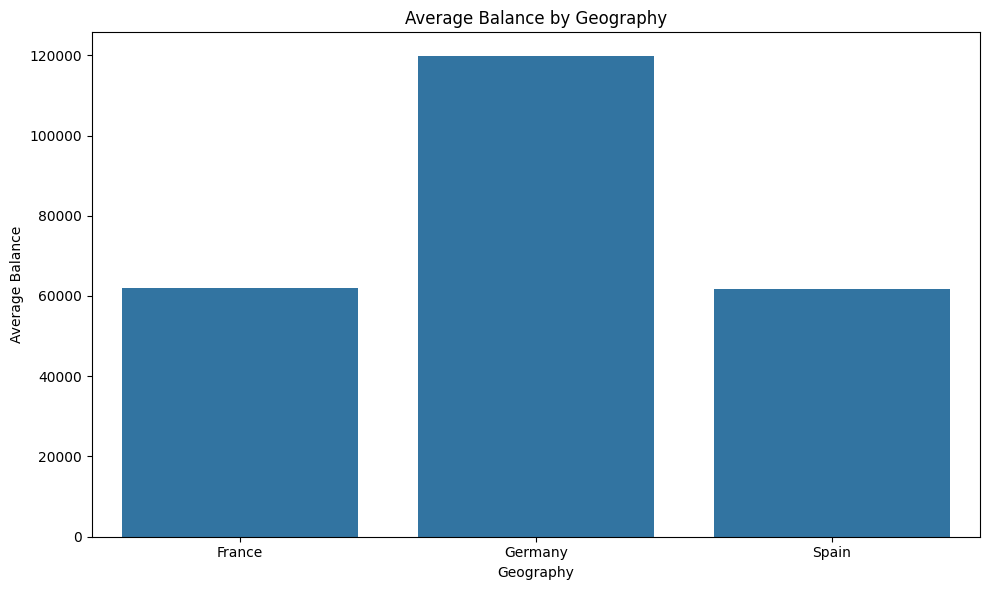

In [46]:
# Create a new figure with appropriate size
plt.figure(figsize=(10, 6))

# Calculate mean balance for each geography
geography_balance = pd.DataFrame({
    'Geography': ['France', 'Germany', 'Spain'],
    'Average Balance': [
        df[df['Geography_France'] == 1]['Balance'].mean(),
        df[df['Geography_Germany'] == 1]['Balance'].mean(),
        df[df['Geography_Spain'] == 1]['Balance'].mean()
    ]
})

# Create the barplot
sns.barplot(x='Geography', y='Average Balance', data=geography_balance)
plt.title('Average Balance by Geography')
plt.tight_layout()

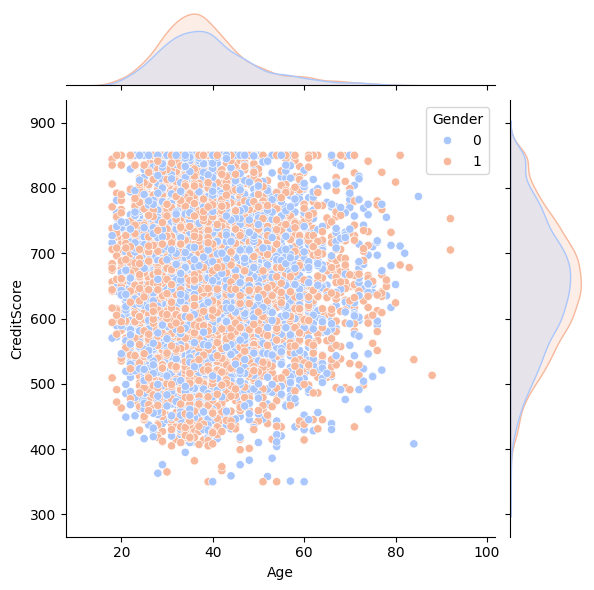

In [33]:
sns.jointplot(x='Age', y='CreditScore', data=df, hue='Gender',palette='coolwarm')

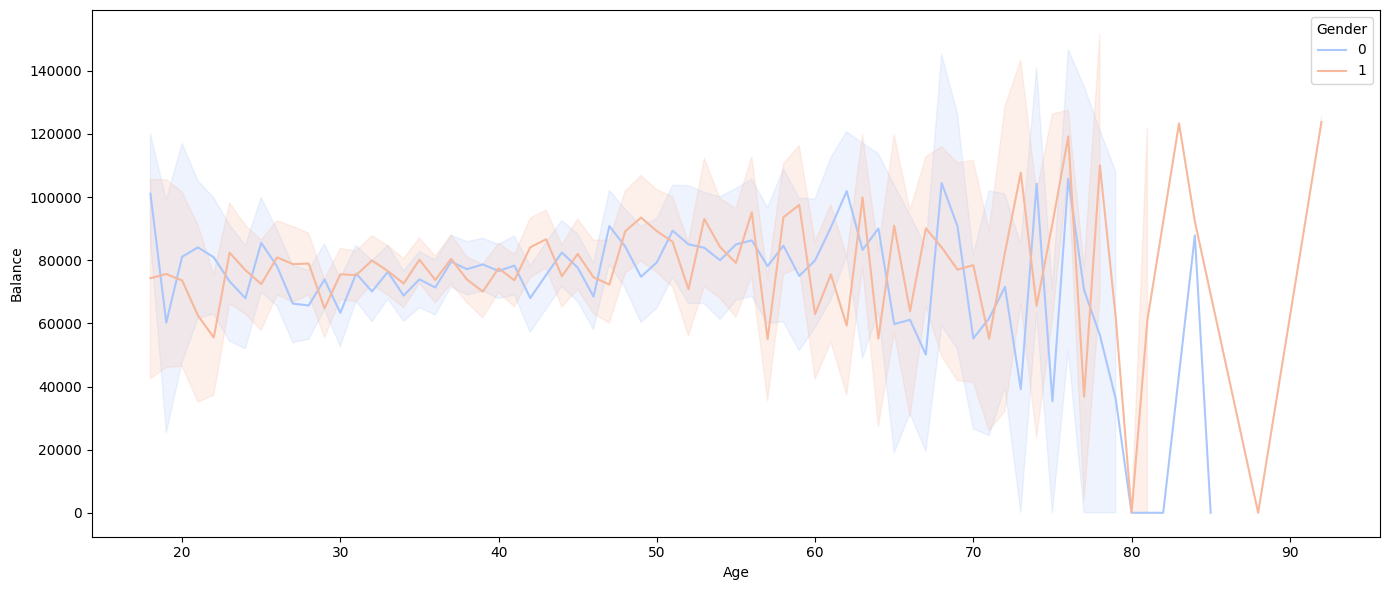

In [37]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='Age', y='Balance', data=df,hue='Gender', palette='coolwarm')
plt.tight_layout()

In [61]:
with open("onehot_encoder_geo.pkl", "wb") as f:
    pickle.dump(onehot_encoder_geo, f)
    
with open("label_encoder_gender.pkl", "wb") as f:
    pickle.dump(label_encoder_gender, f)

In [66]:
x=df.drop('Exited',axis=1)
y=df['Exited']

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [67]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

## ANN Implementation

In [68]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
## ANN Implementation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [71]:
x_train.shape[1]

12

In [73]:
### Build your ANN model
model= Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


c:\Users\dell\anaconda3\envs\myenv\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [75]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
import tensorflow


opt=tensorflow.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [78]:
import datetime
log_dir = "logs/fit" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

In [81]:
import tensorboard


from tensorflow.keras.callbacks import TensorBoard

tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [82]:
earlyStopping_callback = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

In [84]:
history= model.fit(
    x_train, y_train,validation_data=(x_test, y_test),
    epochs=100, batch_size=32,
    callbacks=[tensorboard_callback, earlyStopping_callback]
)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.7999 - loss: 0.4571 - val_accuracy: 0.8383 - val_loss: 0.4084
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.8376 - loss: 0.3872 - val_accuracy: 0.8497 - val_loss: 0.3802
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8549 - loss: 0.3563 - val_accuracy: 0.8593 - val_loss: 0.3605
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8597 - loss: 0.3436 - val_accuracy: 0.8560 - val_loss: 0.3605
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.8606 - loss: 0.3372 - val_accuracy: 0.8520 - val_loss: 0.3612
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8614 - loss: 0.3330 - val_accuracy: 0.8543 - val_loss: 0.3588
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8641 - loss: 0.3295 - val_accuracy: 0.8563 - val_loss: 0.3578
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8641 - loss: 0.3266 -

In [85]:
## Save the model
model.save('model.h5')

In [86]:
## Load the TensorBoard Extension
%load_ext tensorboard